# <font color = Blue> Predicting Housing Price 🏠 </font>

In this data science project, I will utilize the dataset from "House Prices: Advanced Regression Techniques" to demonstrate core skills of a data scientist. This includes data cleaning, feature engineering, building models, as well as analyzing and interpreting results. The goal is to create a model that can accurately predict house sale prices, showcasing abilities in data processing and model development. The data for this project originates from a Kaggle competition: House Prices - Advanced Regression Techniques.

In [1]:
# import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder


In [2]:
# import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data Description & Exploration

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
# Columns of Data
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Some basic statistical information about the housing dataset, including the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for each feature.

## Analyze the Target Variables -- SalePrice

In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

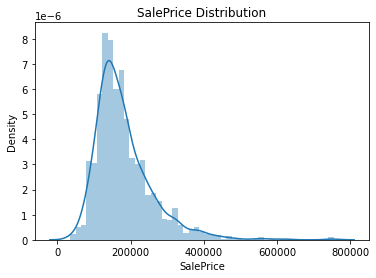

In [9]:
sns.distplot(train['SalePrice'])
plt.title('SalePrice Distribution')
plt.show()

A **right-skewed** distribution, also known as a **positive skew**, means that most data values are concentrated on the lower end, with a few higher values on the right end. This results in *an average that is higher than the median* due to these high-value points. 
In the context of housing prices, it suggests that most houses are relatively inexpensive, but there are a few very expensive ones, which are not common.

In [10]:
# skewness
skewness = train['SalePrice'].skew()
print(f"Skewness: {skewness}")

# kurtosis
kurtosis = train['SalePrice'].kurt()
print(f"Kurtosis: {kurtosis}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


The skewness value of 1.88 indicates that the SalePrice distribution is positively skewed, meaning the tail of the data extends towards the right. This suggests that *most of the houses are priced below the average*, but there are also a few houses with prices significantly above the average. 

The kurtosis value of 6.54, which is relatively high, shows that the SalePrice distribution is more peaked than a normal distribution and has heavier tails. This might implies the presence of more *extreme values* or *outliers* in the data.

The results are consistent with observations from the graph.

## Analyze the relationship between the important variables and SalePrice

In [11]:
correlation = train.corr()
print(correlation['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

#### The top three variables with the highest correlation coefficients (OverallQual, GrLivArea, and GarageCars) with sale price will be analyzed next.

### OverallQual vs SalePrice

The **OverallQual** variable in your dataset is a rating of the overall material and finish quality of the house, with a scale ranging from 1 (Very Poor) to 10 (Very Excellent). This scale provides a quantitative measure of the house's overall quality and craftsmanship. The strong positive correlation between OverallQual and SalePrice indicates that the quality of construction and finish is a key factor in determining a house's market value. Houses with higher quality ratings tend to have higher market values, making this feature crucial for real estate valuation and market analysis.

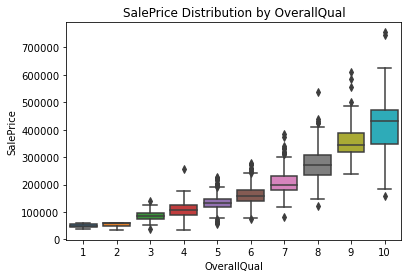

In [12]:
sns.boxplot(data=train, x='OverallQual', y='SalePrice')
plt.title('SalePrice Distribution by OverallQual')
plt.show()


The boxplot illustrates that higher overall quality ratings of houses are associated with higher sale prices. As the quality rating increases, the median sale price rises. This suggests that quality is a significant factor in determining the value of a house. 

There are some exceptions (**outliers**), with a few houses at higher quality ratings selling for much more than others, which could be due to additional features or desirable locations.

### GrLivArea vs SalePrice

GrLivArea: Above grade (ground) living area square feet

In the real estate market, this is an important indicator of the size of a home and usually has a strong correlation with the total value of the home. For example, when analyzing home prices, a larger "GrLivArea" tends to mean a higher home price.

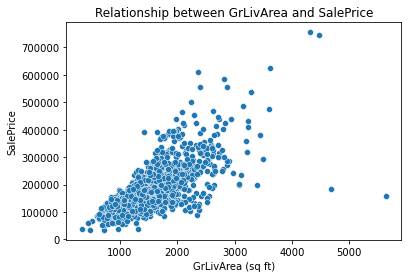

In [13]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.title('Relationship between GrLivArea and SalePrice')
plt.xlabel('GrLivArea (sq ft)')
#plt.ylabel('SalePrice')
plt.show()

The scatter plot shows a direct and positive correlation between the ground living area (GrLivArea) and the sale prices of houses (SalePrice). As the living area size increases, so does the sale price, indicating that GrLivArea is a significant predictor for SalePrice. There are a few data points that deviate significantly from the trend, which could be exceptional cases or outliers in the data.

### GarageCars vs SalePrice

GarageCars: Size of garage in car capacity

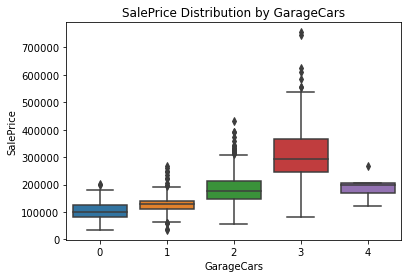

In [14]:
sns.boxplot(data=train, x='GarageCars', y='SalePrice')
plt.title('SalePrice Distribution by GarageCars')
plt.show()

The boxplot suggests a trend where houses with larger garages generally sell for more. There's a rise in median price from homes with no garage to those that can accommodate three cars. Notably, the price dips for homes with four-car garages, which could be due to various reasons not shown by the plot.

# Data Cleaning and Preprocessing

## Normalization of the Target Variable 

Given the observed skewness and kurtosis in the SalePrice distribution, applying a log transformation could help in normalizing the distribution, thus improving the linear model's assumptions about homoscedasticity and error normality. Log transformation is particularly effective in dealing with right-skewed data by pulling in long tails and reducing the effect of outliers, leading to a more symmetric distribution of data. Let's apply a log transformation to the SalePrice and examine the effects on its skewness and kurtosis.

Skewness after log transformation: 0.12134661989685329
Kurtosis after log transformation: 0.809519155707878


Text(0, 0.5, 'Frequency')

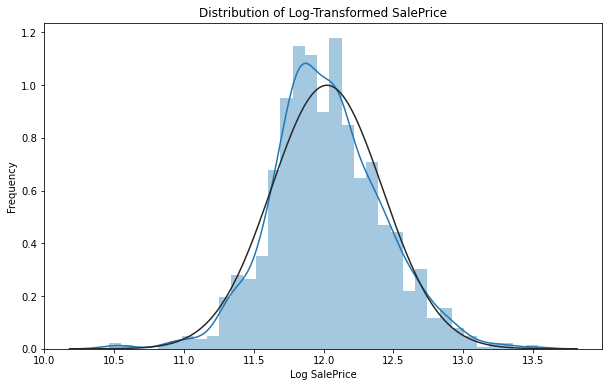

In [15]:
# Applying log transformation to SalePrice
train['Log_SalePrice'] = np.log1p(train['SalePrice'])

# Calculating skewness and kurtosis after log transformation
log_skewness = train['Log_SalePrice'].skew()
log_kurtosis = train['Log_SalePrice'].kurt()

print(f"Skewness after log transformation: {log_skewness}")
print(f"Kurtosis after log transformation: {log_kurtosis}")

# Plotting the distribution of SalePrice after log transformation
plt.figure(figsize=(10, 6))
sns.distplot(train['Log_SalePrice'], fit=norm);
plt.title('Distribution of Log-Transformed SalePrice')
plt.xlabel('Log SalePrice')
plt.ylabel('Frequency')


Skewness after log transformation: The skewness value has been significantly reduced to 0.121, which is much closer to 0. This implies that the distribution of the SalePrice after log transformation is now much more symmetrical. In statistical terms, a skewness between -0.5 and 0.5 is considered very good for most statistical analyses that assume normality.

Kurtosis after log transformation: The kurtosis value has also improved, coming down to 0.809. This value is closer to the kurtosis of a normal distribution, which is 3. However, in practical applications, a kurtosis value in the range of -2 to +2 is often considered acceptable for indicating a distribution that is not too peaked or flat relative to a normal distribution. The transformed kurtosis here indicates a modest peak, but it's much more in line with what many modeling techniques would handle well.

Overall, these transformed values suggest that the log transformation has helped in normalizing the distribution of SalePrice, making it more suitable for linear regression and other modeling techniques that assume normality in the input variables. This should lead to better model performance and more reliable statistical inferences.

In [18]:
train[['SalePrice','Log_SalePrice']].describe()

,SalePrice,Log_SalePrice
count,1460.000000,1460.000000
mean,180921.195890,12.024057
std,79442.502883,0.399449
min,34900.000000,10.460271
25%,129975.000000,11.775105
50%,163000.000000,12.001512
75%,214000.000000,12.273736
max,755000.000000,13.534474


## Missing Data

In [19]:
# training data
missing_values_count = train.isnull().sum()
missing_values = missing_values_count[missing_values_count > 0]

total_rows = train.shape[0]
missing_percentage = (missing_values / total_rows) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_info

,Missing Values,Percentage (%)
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


### Delete features

**Alley** (93.77% missing): With over 90% of the data missing, this indicates that the vast majority of the records lack information for this feature. Retaining a feature with such a high proportion of missing values may not provide effective information for the model, and could instead introduce noise or bias.

**PoolQC** (99.52% missing): This feature is almost entirely missing, and being marked as N/A indicates that the house does not have a pool. The presence or absence of a pool can be represented by the 'PoolArea' feature being equal to zero, so there is no need to retain the 'PoolQC' feature.

**FireplaceQu** (47.26 missing): Missing nearly half of the ratio and the same as PoolQC, when FireplaceQu marked as NA value for the no fireplace; however, in 'Fireplaces', this variable is zero, which can represent the existence of a fireplace, so remove it!

**Fence** (80.75% missing) and **MiscFeature** (96.30% missing): These features also have a very high percentage of missing values, similar to the previous cases. This suggests that most houses lack these features. In such cases, their contribution to predicting house prices may be very limited, hence the decision to delete them.

**LotFrontage** (17.74% missing): Although the percentage of missing values for this feature is not as high as the others, if further analysis reveals that it has a low correlation with house prices, then removing it might be a reasonable choice. In practical data science applications, sometimes a balance needs to be struck between the importance of a feature and its completeness. If a feature is very important for the prediction target, even with some missing values, we might choose to retain and attempt to fill these missing values. Conversely, if a feature has little relevance to the prediction target, even with a moderate amount of missing values, removing it could be a good choice.

In [20]:
columns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage','FireplaceQu']
train_dropped = train.drop(columns=columns_to_drop, axis=1)

train_dropped.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Log_SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,12.247699
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,12.109016
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,12.317171
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849405
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,12.429220


In [21]:
# do the same thing for test data

columns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage','FireplaceQu']
test_dropped = test.drop(columns=columns_to_drop, axis=1)

test_dropped

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


### Fill in the missing value

1. Filling Missing Values in **MasVnrType**, **MasVnrArea**, and **Electrical**:
Since there are very few missing values for these features, I chose to use mode to fill in the data for missing values in MasVnrType, MasVnrArea, and electrical. 

2. Filling Missing Values in Basement-Related Features:
We filled the missing values in basement-related features (**BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1**, **BsmtFinType2**) with "None", indicating the absence of a basement. This is based on the assumption that missing values in these features suggest that the house does not have a basement.

3. Filling Missing Values in Garage-Related Features:
Similarly, we filled the missing values in garage-related features (**GarageType**, **GarageFinish**, **GarageQual**, **GarageCond**) with "None", indicating the absence of a garage. In **GarageYrBlt** then the no garage is indicated as 0. This is also based on the assumption that missing values in these features indicate that the house does not have a garage.

In [22]:
# use a mode to fill the missing values
for column in ['MasVnrType', 'MasVnrArea', 'Electrical']:
    train_dropped[column].fillna(test_dropped[column].mode()[0], inplace=True)
    
# Replace NA with None
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for feature in basement_features:
    train_dropped[feature].fillna('None', inplace=True)

# Replace NA with None
garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for feature in garage_features:
    train_dropped[feature].fillna('None', inplace=True)
    
# 'GarageYrBlt'
train_dropped['GarageYrBlt'].fillna(0, inplace=True)
    
train_dropped.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Log_SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,12.247699
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,12.109016
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,12.317171
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849405
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,12.429220


In [23]:
# do the same thing for test data

# use a mode to fill the missing values
for column in ['MasVnrType', 'MasVnrArea', 'Electrical']:
    test_dropped[column].fillna(test_dropped[column].mode()[0], inplace=True)
    
# Replace NA with None
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for feature in basement_features:
    test_dropped[feature].fillna('None', inplace=True)

# Replace NA with None
garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for feature in garage_features:
    test_dropped[feature].fillna('None', inplace=True)
    
# 'GarageYrBlt'
test_dropped['GarageYrBlt'].fillna(0, inplace=True)
    
test_dropped.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [24]:
# Check whether there are any missing values in the updated data set.
missing_values_after_cleaning = train_dropped.isnull().sum()
missing_values_after_cleaning[missing_values_after_cleaning > 0]

Series([], dtype: int64)

In [25]:
# Check whether there are any missing values in the updated data set.
test_missing_values_after_cleaning = test_dropped.isnull().sum()
test_missing_values_after_cleaning[test_missing_values_after_cleaning > 0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [26]:
for column in test_dropped.columns:
    if test_dropped[column].isna().any():
        test_dropped[column].fillna(test_dropped[column].mode()[0], inplace=True)

In [27]:
# Check whether there are any missing values in the updated data set.
test_missing_values_after_cleaning = test_dropped.isnull().sum()
test_missing_values_after_cleaning[test_missing_values_after_cleaning > 0]

Series([], dtype: int64)

The data set is now complete without any missing values.

In [31]:
# Category and numerical variables.
categorical_vars = train_dropped.select_dtypes(include=['object']).columns.tolist()
numerical_vars = train_dropped.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical variables:")
print(categorical_vars)
print("\nNumerical variables:")
print(numerical_vars)

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Numerical variables:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',

In [32]:
# Check whether there are any input errors in the category variables.
for var in categorical_vars:
    print(f"Value counts of {var}:")
    print(train_dropped[var].value_counts())
    print("\n")

Value counts of MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Value counts of Street:
Pave    1454
Grvl       6
Name: Street, dtype: int64


Value counts of LotShape:
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Value counts of LandContour:
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Value counts of Utilities:
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Value counts of LotConfig:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Value counts of LandSlope:
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Value counts of Neighborhood:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber   

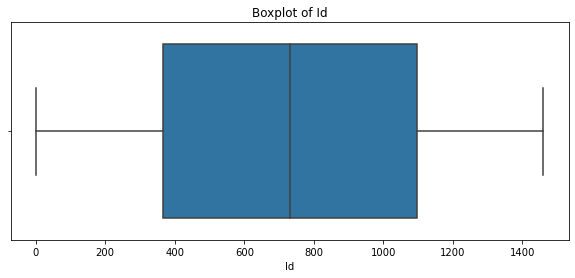

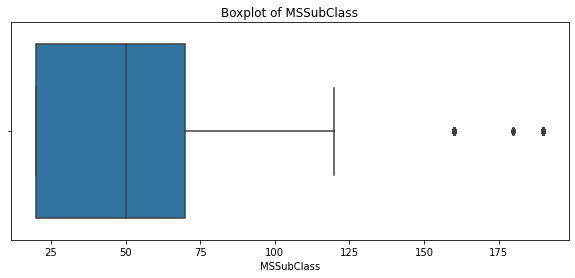

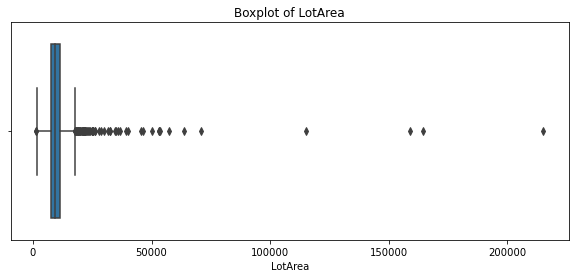

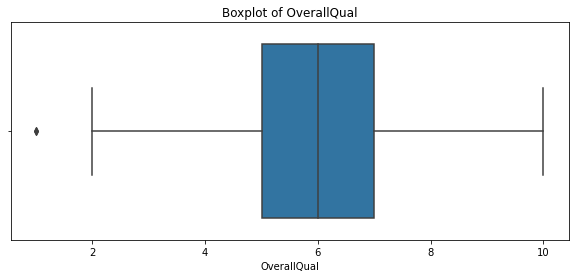

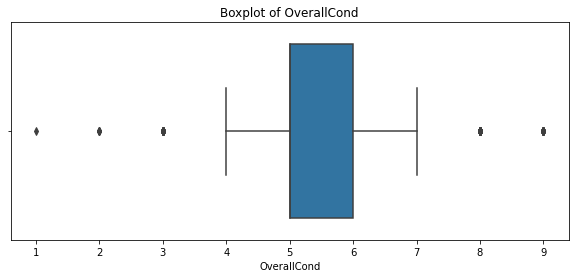

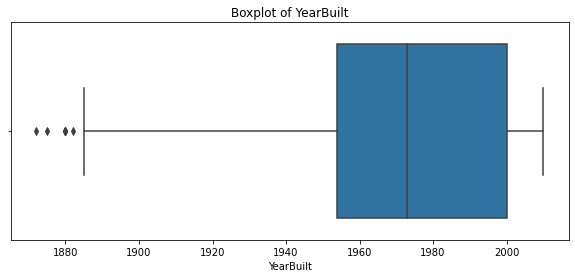

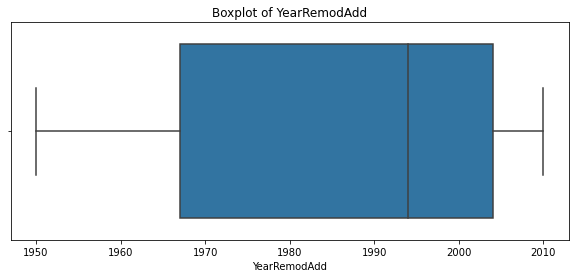

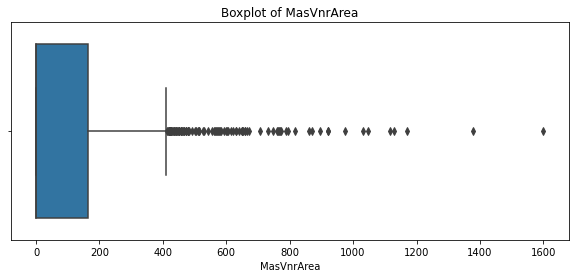

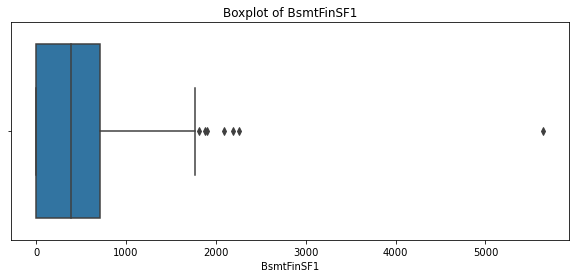

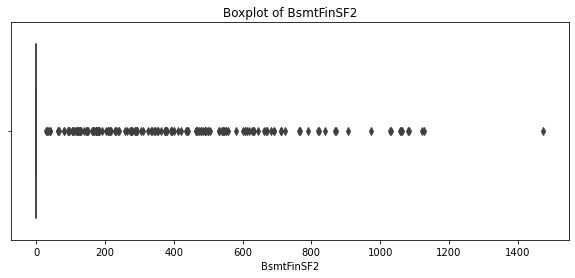

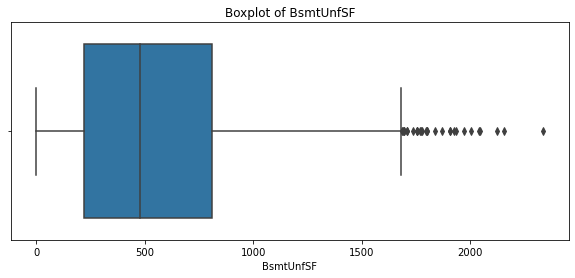

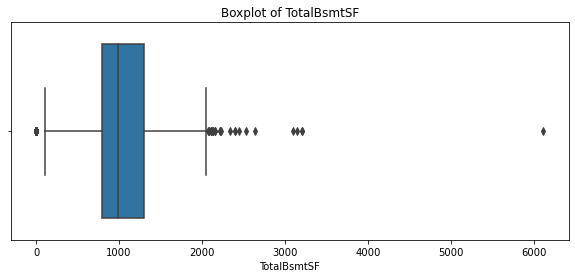

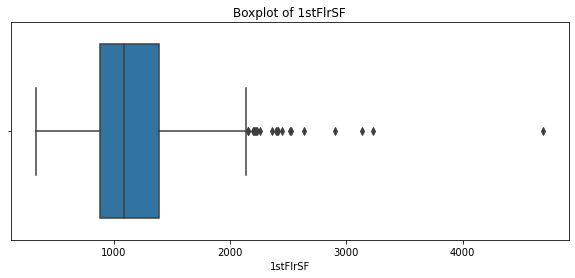

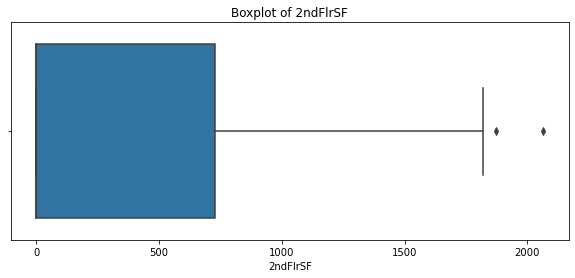

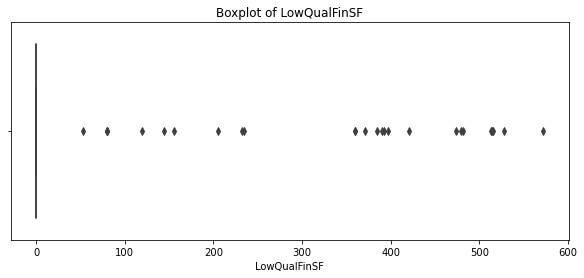

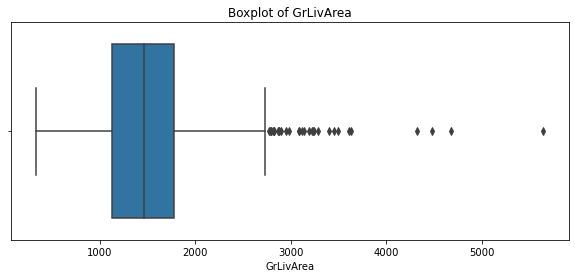

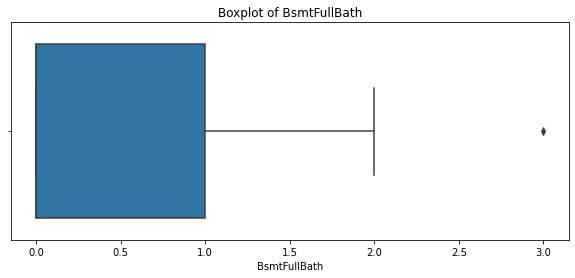

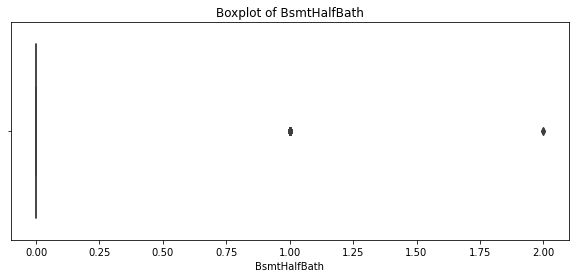

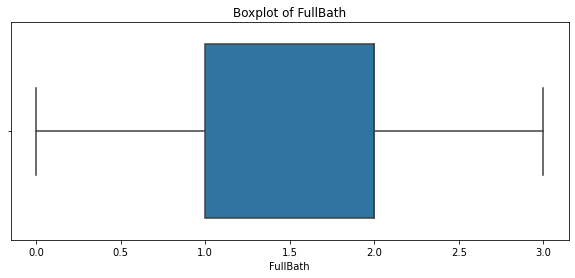

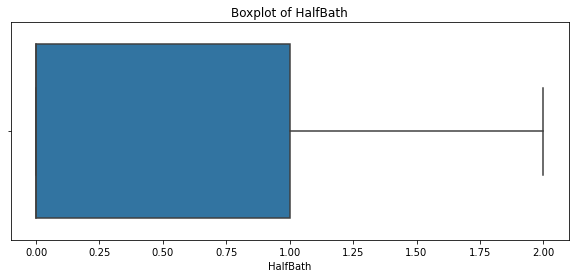

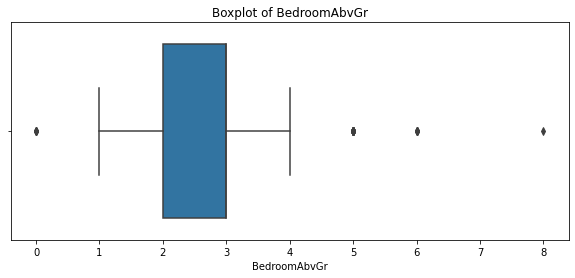

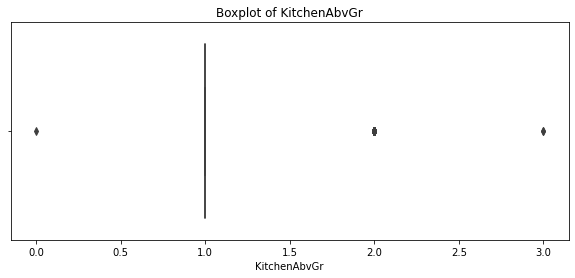

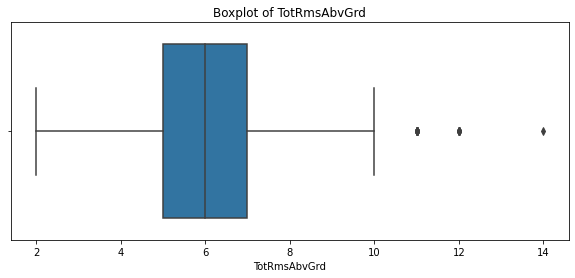

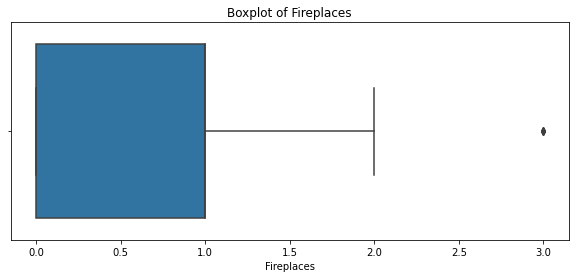

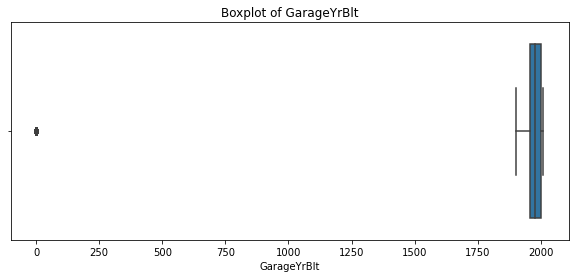

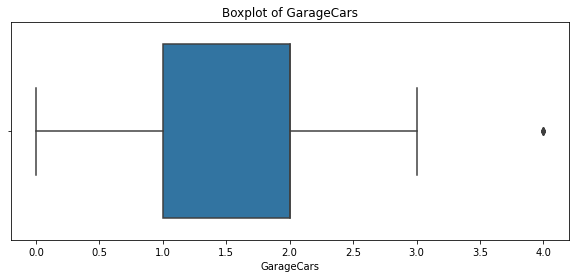

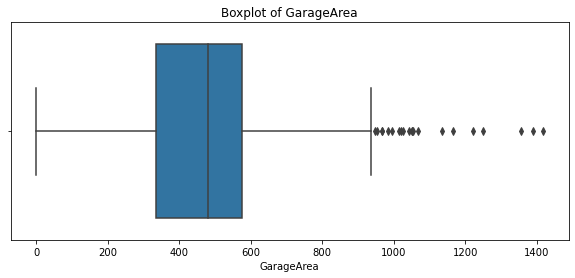

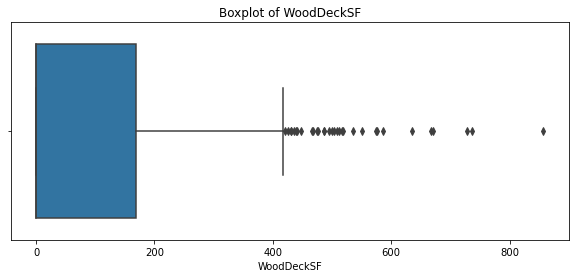

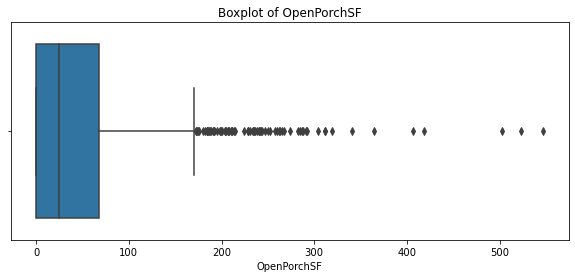

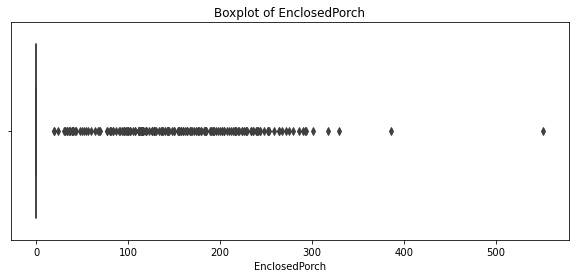

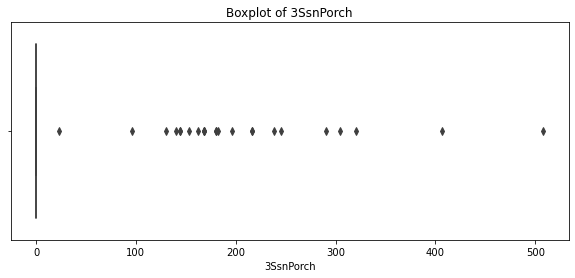

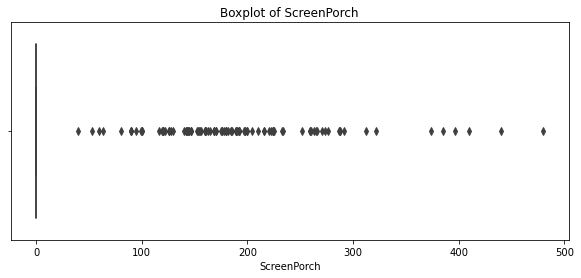

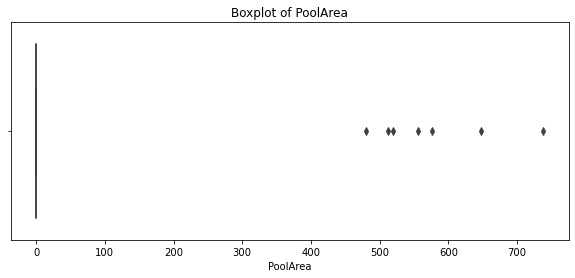

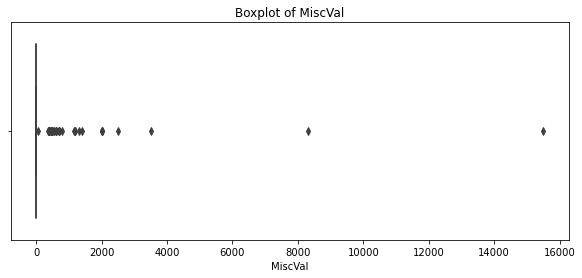

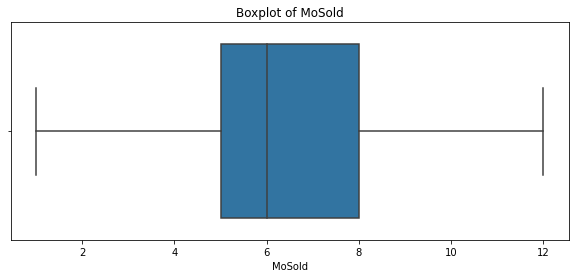

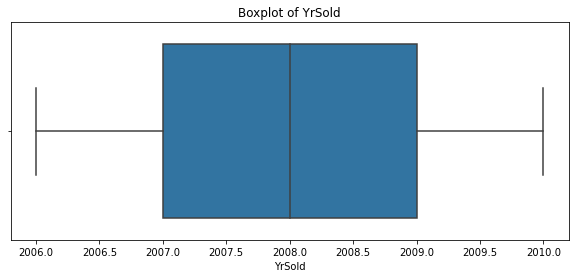

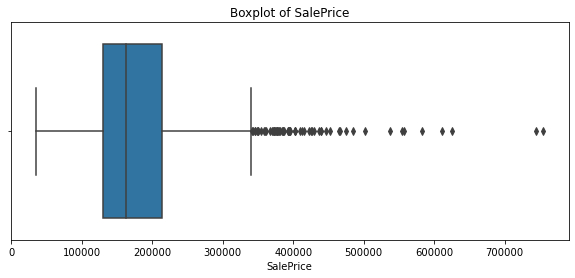

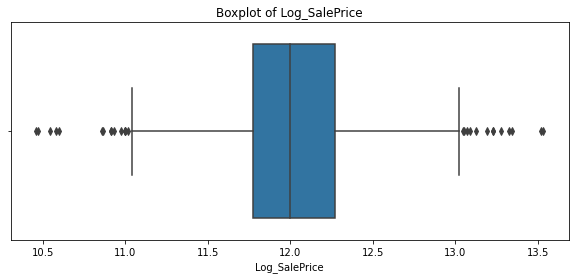

In [34]:
# Check for values that are too extreme in numeric variables and decide whether to exclude them.
for var in numerical_vars:
    plt.figure(figsize=(10, 4))
    sns.boxplot(train_dropped[var])
    plt.title(f"Boxplot of {var}")
    plt.show()

## Encoding

The first step is to determine whether each variable is ordinal or nominal. Ordered variables have a clear order or rank, while disordered variables do not. Based on the description provided, we can categorize these variables into ordered and unordered and choose the appropriate encoding method (label encoding for ordered variables and Frequency  Encoding for unordered variables).

### Label Encoding 

In [35]:
train_cleaned = train_dropped
test_cleaned = test_dropped

In [36]:
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
exposure_mapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
fin_type_mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}
functional_mapping = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
garage_finish_mapping = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}
pool_qc_mapping = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'None': 0}
lot_shape_mapping = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
utilities_mapping = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}
land_slope_mapping = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
overall_qual_cond_mapping = {10: 'Very Excellent', 9: 'Excellent', 8: 'Very Good', 7: 'Good', 6: 'Above Average',
                             5: 'Average', 4: 'Below Average', 3: 'Fair', 2: 'Poor', 1: 'Very Poor'}
train_cleaned['ExterQual_encoded'] = train_cleaned['ExterQual'].map(quality_mapping)
train_cleaned['ExterCond_encoded'] = train_cleaned['ExterCond'].map(quality_mapping)
train_cleaned['BsmtQual_encoded'] = train_cleaned['BsmtQual'].map(quality_mapping)
train_cleaned['BsmtCond_encoded'] = train_cleaned['BsmtCond'].map(quality_mapping)
train_cleaned['BsmtExposure_encoded'] = train_cleaned['BsmtExposure'].map(exposure_mapping)
train_cleaned['BsmtFinType1_encoded'] = train_cleaned['BsmtFinType1'].map(fin_type_mapping)
train_cleaned['BsmtFinType2_encoded'] = train_cleaned['BsmtFinType2'].map(fin_type_mapping)
train_cleaned['HeatingQC_encoded'] = train_cleaned['HeatingQC'].map(quality_mapping)
train_cleaned['KitchenQual_encoded'] = train_cleaned['KitchenQual'].map(quality_mapping)
train_cleaned['Functional_encoded'] = train_cleaned['Functional'].map(functional_mapping)
train_cleaned['GarageFinish_encoded'] = train_cleaned['GarageFinish'].map(garage_finish_mapping)
train_cleaned['GarageQual_encoded'] = train_cleaned['GarageQual'].map(quality_mapping)
train_cleaned['GarageCond_encoded'] = train_cleaned['GarageCond'].map(quality_mapping)
train_cleaned['LotShape_encoded'] = train_cleaned['LotShape'].map(lot_shape_mapping)
train_cleaned['Utilities_encoded'] = train_cleaned['Utilities'].map(utilities_mapping)
train_cleaned['LandSlope_encoded'] = train_cleaned['LandSlope'].map(land_slope_mapping)


train_cleaned.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,BsmtFinType2_encoded,HeatingQC_encoded,KitchenQual_encoded,Functional_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,LotShape_encoded,Utilities_encoded,LandSlope_encoded
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,5,4,8,2,3,3,4,4,3
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,1,5,3,8,2,3,3,4,4,3
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,1,5,4,8,2,3,3,3,4,3
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1,4,4,8,1,3,3,3,4,3
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,1,5,4,8,2,3,3,3,4,3


In [37]:
# do the same thing for test data

test_cleaned['ExterQual_encoded'] = test_cleaned['ExterQual'].map(quality_mapping)
test_cleaned['ExterCond_encoded'] = test_cleaned['ExterCond'].map(quality_mapping)
test_cleaned['BsmtQual_encoded'] = test_cleaned['BsmtQual'].map(quality_mapping)
test_cleaned['BsmtCond_encoded'] = test_cleaned['BsmtCond'].map(quality_mapping)
test_cleaned['BsmtExposure_encoded'] = test_cleaned['BsmtExposure'].map(exposure_mapping)
test_cleaned['BsmtFinType1_encoded'] = test_cleaned['BsmtFinType1'].map(fin_type_mapping)
test_cleaned['BsmtFinType2_encoded'] = test_cleaned['BsmtFinType2'].map(fin_type_mapping)
test_cleaned['HeatingQC_encoded'] = test_cleaned['HeatingQC'].map(quality_mapping)
test_cleaned['KitchenQual_encoded'] = test_cleaned['KitchenQual'].map(quality_mapping)
test_cleaned['Functional_encoded'] = test_cleaned['Functional'].map(functional_mapping)
test_cleaned['GarageFinish_encoded'] = test_cleaned['GarageFinish'].map(garage_finish_mapping)
test_cleaned['GarageQual_encoded'] = test_cleaned['GarageQual'].map(quality_mapping)
test_cleaned['GarageCond_encoded'] = test_cleaned['GarageCond'].map(quality_mapping)
test_cleaned['LotShape_encoded'] = test_cleaned['LotShape'].map(lot_shape_mapping)
test_cleaned['Utilities_encoded'] = test_cleaned['Utilities'].map(utilities_mapping)
test_cleaned['LandSlope_encoded'] = test_cleaned['LandSlope'].map(land_slope_mapping)


test_cleaned.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,BsmtFinType2_encoded,HeatingQC_encoded,KitchenQual_encoded,Functional_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,LotShape_encoded,Utilities_encoded,LandSlope_encoded
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,3,3,8,1,3,3,4,4,3
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1,3,4,8,1,3,3,3,4,3
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,1,4,3,8,3,3,3,3,4,3
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,1,5,4,8,3,3,3,3,4,3
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,1,5,4,8,2,3,3,3,4,3


In [38]:
train_cleaned[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                      'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
                      'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual', 
                      'GarageCond', 'LotShape', 'Utilities', 
                      'LandSlope']].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,LotShape,Utilities,LandSlope
0,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,Typ,RFn,TA,TA,Reg,AllPub,Gtl
1,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,Typ,RFn,TA,TA,Reg,AllPub,Gtl
2,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,Typ,RFn,TA,TA,IR1,AllPub,Gtl
3,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Typ,Unf,TA,TA,IR1,AllPub,Gtl
4,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,Typ,RFn,TA,TA,IR1,AllPub,Gtl


### Frequency Encoding

When dealing with unordered categorical variables, One-Hot Encoding is a common approach but comes with several drawbacks, such as dimensionality explosion, creation of sparse matrices, and potential information loss, especially when the categorical variable has a large number of unique values. These issues can lead to increased computational burden and decreased model efficiency.

Therefore, in this project, Frequency Encoding was chosen. This method represents categories by calculating the frequency of each category's occurrence, avoiding increased dimensionality, reducing data sparsity, and preserving some level of category information. This not only optimizes computational efficiency but also helps improve model generalization.

In the future, Target Encoding is also considered for further enhancing model accuracy. It encodes categories based on the average value of the target variable for each category, providing richer statistical information but requires careful handling to avoid overfitting.

In [39]:
unordered_features =['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood',
                     'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                     'RoofMatl', 'Electrical', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                     'Foundation', 'Heating', 'CentralAir', 'GarageType', 'PavedDrive',
                     'SaleType', 'SaleCondition']


for feature in unordered_features:
    freq_encoding = train_cleaned[feature].value_counts(normalize=True)
    train_cleaned[feature + '_Freq'] = train_cleaned[feature].map(freq_encoding)

In [40]:
# do the same thing for test data

for feature in unordered_features:
    freq_encoding = test_cleaned[feature].value_counts(normalize=True)
    test_cleaned[feature + '_Freq'] = test_cleaned[feature].map(freq_encoding)

After completing the encoding of these variable, the original variable will no longer be useful for model construction. Therefore, in order to maintain the neatness of the data set and reduce the computational complexity of the model, I choose to delete the original variables that have been encoded.

In [41]:
train_encoded = train_cleaned.drop(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                                    'HeatingQC',  'KitchenQual', 'Functional', 'GarageFinish', 
                                    'GarageQual',  'GarageCond', 'LotShape', 'Utilities', 
                                    'LandSlope','MSZoning', 'Street', 'LandContour', 'LotConfig', 
                                    'Neighborhood','Condition1', 'Condition2', 'BldgType', 
                                    'HouseStyle', 'RoofStyle','RoofMatl', 'Electrical', 
                                    'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation', 
                                    'Heating', 'CentralAir', 'GarageType', 'PavedDrive', 
                                    'SaleType', 'SaleCondition'],axis=1)

train_encoded

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Exterior1st_Freq,Exterior2nd_Freq,MasVnrType_Freq,Foundation_Freq,Heating_Freq,CentralAir_Freq,GarageType_Freq,PavedDrive_Freq,SaleType_Freq,SaleCondition_Freq
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0.352740,0.345205,0.304795,0.443151,0.978082,0.934932,0.595890,0.917808,0.867808,0.820548
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0.150685,0.146575,0.597260,0.434247,0.978082,0.934932,0.595890,0.917808,0.867808,0.820548
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0.352740,0.345205,0.304795,0.443151,0.978082,0.934932,0.595890,0.917808,0.867808,0.820548
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0.141096,0.026027,0.597260,0.100000,0.978082,0.934932,0.265068,0.917808,0.867808,0.069178
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0.352740,0.345205,0.304795,0.443151,0.978082,0.934932,0.595890,0.917808,0.867808,0.820548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0.352740,0.345205,0.597260,0.443151,0.978082,0.934932,0.595890,0.917808,0.867808,0.820548
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,0.073973,0.097260,0.087671,0.434247,0.978082,0.934932,0.595890,0.917808,0.867808,0.820548
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0.041781,0.041096,0.597260,0.004110,0.978082,0.934932,0.595890,0.917808,0.867808,0.820548
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,0.150685,0.146575,0.597260,0.434247,0.978082,0.934932,0.595890,0.917808,0.867808,0.820548


In [42]:
test_encoded = test_cleaned.drop(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                                    'HeatingQC',  'KitchenQual', 'Functional', 'GarageFinish', 
                                    'GarageQual',  'GarageCond', 'LotShape', 'Utilities', 
                                    'LandSlope','MSZoning', 'Street', 'LandContour', 'LotConfig', 
                                    'Neighborhood','Condition1', 'Condition2', 'BldgType', 
                                    'HouseStyle', 'RoofStyle','RoofMatl', 'Electrical', 
                                    'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation', 
                                    'Heating', 'CentralAir', 'GarageType', 'PavedDrive', 
                                    'SaleType', 'SaleCondition'],axis=1)

test_encoded

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Exterior1st_Freq,Exterior2nd_Freq,MasVnrType_Freq,Foundation_Freq,Heating_Freq,CentralAir_Freq,GarageType_Freq,PavedDrive_Freq,SaleType_Freq,SaleCondition_Freq
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.350240,0.350240,0.612748,0.411926,0.99109,0.930775,0.584647,0.891707,0.86292,0.825223
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.140507,0.132968,0.297464,0.411926,0.99109,0.930775,0.584647,0.891707,0.86292,0.825223
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.350240,0.350240,0.612748,0.453050,0.99109,0.930775,0.584647,0.891707,0.86292,0.825223
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,0.350240,0.350240,0.297464,0.453050,0.99109,0.930775,0.584647,0.891707,0.86292,0.825223
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0.150788,0.136395,0.612748,0.453050,0.99109,0.930775,0.584647,0.891707,0.86292,0.825223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.044551,0.045236,0.612748,0.411926,0.99109,0.930775,0.052090,0.891707,0.86292,0.825223
1455,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,0.044551,0.045236,0.612748,0.411926,0.99109,0.930775,0.004112,0.891707,0.86292,0.061001
1456,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0.350240,0.350240,0.612748,0.411926,0.99109,0.930775,0.268677,0.891707,0.86292,0.061001
1457,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.150788,0.029472,0.612748,0.453050,0.99109,0.930775,0.052090,0.891707,0.86292,0.825223


So far, the Data Preprocessing is over and the training model is followed.

# Data Modlling

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
#!pip install xgboost
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [44]:
X = train_encoded.drop(['Log_SalePrice','SalePrice','Id'], axis=1)
y = train_encoded['Log_SalePrice']

# Split data set for Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression 

In [45]:
# Establish a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Prediction and evaluation
y_pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"RMSE of the Linear Regression Model: {rmse}")

RMSE of the Linear Regression Model: 0.14392996350391232


**Linear regression** is one of the most basic prediction models, assuming a linear relationship between the target variable and features. This model is easy to implement and understand, often used to determine the impact of each feature on the target variable. For this project, the RMSE of the linear regression model is 0.1439, indicating the model has a good predictive capability, though there might be some prediction errors.

### Random Forest

In [46]:
# Create a random forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest = random_forest.fit(X_train, y_train)

# Prediction and evaluation
y_pred_rf = random_forest.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"RMSE of random forest model: {rmse_rf}")


RMSE of random forest model: 0.14193401326523775


**Random Forest** is an ensemble learning method based on decision trees, improving prediction accuracy and avoiding overfitting by combining predictions from multiple decision trees. The RMSE of the Random Forest model is 0.1419, slightly lower than the linear regression model, showing better predictive performance.

### XGBoost (eXtreme Gradient Boosting)

In [47]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)

# Prediction and evaluation
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f"RMSE of XGBoost model: {rmse_xgb}")

RMSE of XGBoost model: 0.1437233915945618


**XGBoost** is an advanced gradient boosting tree algorithm, known for its efficiency, flexibility, and strong performance. It has performed exceptionally well in many machine learning competitions. The RMSE of the XGBoost model is 0.1437, comparable to the linear regression model, indicating it also performs well on this dataset.

### Feature Selection

In [48]:
selector = SelectKBest(f_regression, k=10)  # Choose the 10 features with the highest ratings
selector.fit_transform(X_train, y_train)

# View the selected features
cols = selector.get_support(indices=True)
selected_columns = X_train.columns[cols]
print(selected_columns)

# Reconstruct the training and test data set with the selected features selected by SelectKBest
X_train_selected = X_train.iloc[:, cols]
X_test_selected = X_test.iloc[:, cols]

model = LinearRegression()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Models using selected features RMSE: {rmse}")


Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars',
       'GarageArea', 'ExterQual_encoded', 'BsmtQual_encoded',
       'KitchenQual_encoded', 'GarageFinish_encoded'],
      dtype='object')
Models using selected features RMSE: 0.17366350652313753


The **feature selection** using *SelectKBest* indicates that the selected ten features are crucial for predicting housing prices. However, the linear regression model using only these features resulted in an RMSE of 0.1737, higher than models using all features, suggesting that other features also contribute to the prediction.

### Random Forest with Best Parameters

In [49]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 20, 'n_estimators': 200}


In [50]:
best_model = RandomForestRegressor(**grid_search.best_params_)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Model with the best parameters model RMSE: {rmse}")


Model with the best parameters model RMSE: 0.14261397213111932


The best parameters found through GridSearchCV for the Random Forest model resulted in an RMSE of 0.1426, a slight improvement over the basic Random Forest model. This indicates that parameter tuning has a positive effect on model performance, though the improvement is modest.

### Conclusion

In this housing price prediction project, the three main models (Linear Regression, Random Forest, and XGBoost) all demonstrated good predictive abilities, with the Random Forest model slightly outperforming the others in terms of prediction accuracy. Feature selection revealed the importance of certain key features in predicting housing prices but also indicated that a more comprehensive feature set might be more appropriate. Furthermore, parameter optimization through GridSearchCV further proved the potential of detail adjustments to enhance model performance. Overall, this analysis highlighted the effectiveness of different models in housing price prediction, while also showing room for further optimization.

For future work, there is an opportunity to delve deeper into feature engineering, such as exploring more feature combinations and interaction terms, as well as enriching our dataset with external data, which might reveal more insights into the dynamics of housing prices. Additionally, a deeper investigation into the importance of features to determine which have the greatest impact on prediction results is key to improving model performance.

Exploring more models and algorithms is another path to enhance prediction accuracy. Beyond the models already used, deep learning models like Convolutional Neural Networks and Recurrent Neural Networks could be particularly effective in capturing complex nonlinear relationships, especially when dealing with image data (such as pictures of houses), potentially providing a new perspective for housing price prediction.